In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [71]:
dataset = pd.read_excel('get_around_delay_analysis.xlsx', index_col=0) 
dataset.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
505000,363965,mobile,canceled,NaN,NaN,NaN
507750,269550,mobile,ended,-81.0,NaN,NaN
508131,359049,connect,ended,70.0,NaN,NaN
508865,299063,connect,canceled,NaN,NaN,NaN
511440,313932,mobile,ended,NaN,NaN,NaN


In [72]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 21310

Display of dataset: 


,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
505000,363965,mobile,canceled,NaN,NaN,NaN
507750,269550,mobile,ended,-81.0,NaN,NaN
508131,359049,connect,ended,70.0,NaN,NaN
508865,299063,connect,canceled,NaN,NaN,NaN
511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,2,2,NaN,NaN,NaN
top,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,17003,18045,NaN,NaN,NaN
mean,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [73]:
mask = (dataset['state'] == 'ended') 

In [74]:
# I replace NaN values at column delay_at_checkout_in_minutes by zero when state is ended 

dataset['delay_at_checkout_in_minutes'] = dataset[mask]['delay_at_checkout_in_minutes'].fillna(0)

In [75]:
# Mean per checking type
dataset[mask].groupby(['checkin_type'])['delay_at_checkout_in_minutes'].mean()

checkin_type
connect   -42.296951
mobile     78.547675
Name: delay_at_checkout_in_minutes, dtype: float64

In [76]:
sns.catplot(x="checkin_type", y="delay_at_checkout_in_minutes", kind="bar", data=dataset[mask])

In [77]:
dataset['checkin_type'].value_counts()

mobile     17003
connect     4307
Name: checkin_type, dtype: int64

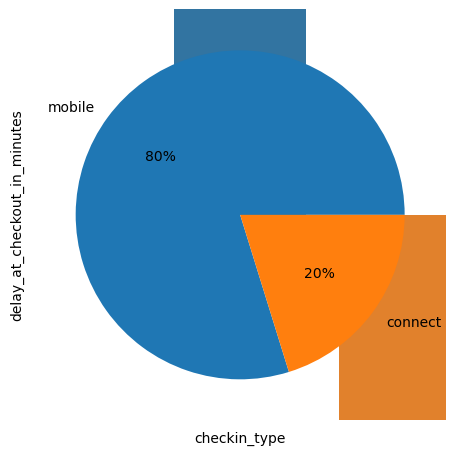

In [78]:
plt.pie(dataset['checkin_type'].value_counts(), labels=dataset['checkin_type'].value_counts().index, autopct='%1.0f%%')
plt.show()


In [79]:
#dataset where time_delta_with_previous_rental_in_minutes is not null

df_delta_not_null = dataset[dataset['time_delta_with_previous_rental_in_minutes'].notnull()]
df_delta_not_null.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
511639,370585,connect,ended,-15.0,563782.0,570.0
519491,312389,mobile,ended,58.0,545639.0,420.0
521156,392479,mobile,ended,0.0,537298.0,0.0
525044,349751,mobile,ended,0.0,510607.0,60.0
528808,181625,connect,ended,-76.0,557404.0,330.0


New number of lines we will be working on

In [80]:
df_delta_not_null['checkin_type'].value_counts()

mobile     1028
connect     813
Name: checkin_type, dtype: int64

In [81]:
df_delta_not_null.groupby('checkin_type')['time_delta_with_previous_rental_in_minutes'].mean()

checkin_type
connect    287.675277
mobile     272.655642
Name: time_delta_with_previous_rental_in_minutes, dtype: float64

In [82]:
data_state_cancel = df_delta_not_null[df_delta_not_null['state'] == 'canceled']
data_state_cancel.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
543768,374169,connect,canceled,NaN,543010.0,210.0
546160,352528,connect,canceled,NaN,546578.0,630.0
564627,341431,mobile,canceled,NaN,552005.0,150.0
568657,317378,connect,canceled,NaN,566412.0,210.0
516550,377700,mobile,canceled,NaN,545076.0,720.0


Proportion of cancelation per type of check in

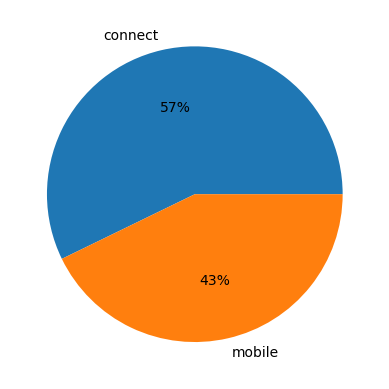

In [83]:
plt.pie(data_state_cancel['checkin_type'].value_counts(), labels=data_state_cancel['checkin_type'].value_counts().index, autopct='%1.0f%%')
plt.show()

Distribution state column

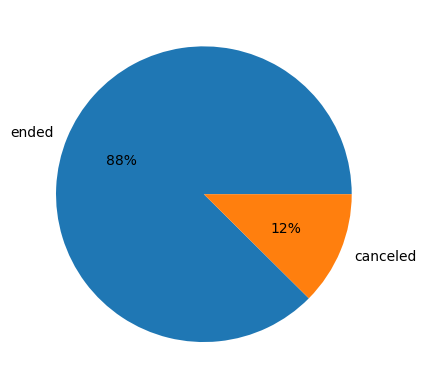

In [84]:
plt.pie(df_delta_not_null['state'].value_counts(), labels=df_delta_not_null['state'].value_counts().index, autopct='%1.0f%%')
plt.show()

We see that 12% of bookings (when delta in less than 12 hours) are canceled of which 57% come from Connect cars.

In [85]:
df_delta_not_null.groupby(['checkin_type', 'state'])['time_delta_with_previous_rental_in_minutes'].describe()

count        mean         std  min   25%    50%    75%  \
checkin_type state                                                              
connect      canceled  131.0  300.000000  254.204642  0.0  60.0  240.0  570.0   
             ended     682.0  285.307918  259.968894  0.0  60.0  180.0  540.0   
mobile       canceled   98.0  288.061224  246.813332  0.0  60.0  210.0  510.0   
             ended     930.0  271.032258  251.539520  0.0  60.0  180.0  510.0   

                         max  
checkin_type state            
connect      canceled  720.0  
             ended     720.0  
mobile       canceled  720.0  
             ended     720.0

In [86]:
df_delta_not_null_new = df_delta_not_null.drop(df_delta_not_null[(df_delta_not_null['checkin_type'] == 'connect') & (df_delta_not_null['time_delta_with_previous_rental_in_minutes'] <= 720)].index)
df_delta_not_null.head()

,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
rental_id,,,,,,
511639,370585,connect,ended,-15.0,563782.0,570.0
519491,312389,mobile,ended,58.0,545639.0,420.0
521156,392479,mobile,ended,0.0,537298.0,0.0
525044,349751,mobile,ended,0.0,510607.0,60.0
528808,181625,connect,ended,-76.0,557404.0,330.0


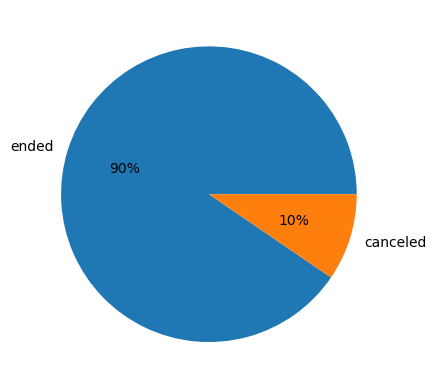

In [87]:
plt.pie(df_delta_not_null_new['state'].value_counts(), labels=df_delta_not_null_new['state'].value_counts().index, autopct='%1.0f%%')
plt.show()

Which share of our owner’s revenue would potentially be affected by the feature How many rentals would be affected by the feature depending on the threshold and scope we choose?

In [88]:
(682 / (21310 - 131))*100

3.220170924028519

It will potentially affect 3.22% of owner's revenue for 720min treshold

How often are drivers late for the next check-in? How does it impact the next driver?

In [89]:
count = (df_delta_not_null['delay_at_checkout_in_minutes'] > 0).sum()
count

802

In [90]:
(count /dataset.shape[0])*100

3.763491318629751

It affects 3.76% of next check-in


How many problematic cases will it solve depending on the chosen threshold and scope?

With a 720min threshold, it will solve 131 problematic cases